In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [75]:
# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the Sun (kg)
AU = 1.496e11  # 1 Astronomical Unit in meters
dt = 60 * 60 * 24  # Time step in seconds (1 day)                  

In [77]:
# Planet initial conditions (Earth-like orbit)
mass_planet = 5.972e24  # Planet mass (kg)
distance = AU  # Distance from Sun (meters)
initial_velocity = 29780  # Initial tangential velocity for Earth (m/s)

In [79]:
# Initialize position and velocity vectors as float arrays
position = np.array([distance, 0], dtype=float)  # Starting at 1 AU on x-axis
velocity = np.array([0, initial_velocity], dtype=float)  # Initial velocity in y direction


In [81]:
# Lists to store position data for plotting
x_positions = []
y_positions = []

In [83]:
# Function to calculate gravitational force
def gravitational_force(position):
    r = np.linalg.norm(position)  # Distance to Sun
    force_magnitude = G * M_sun * mass_planet / r**2
    force_direction = -position / r
    return force_magnitude * force_direction

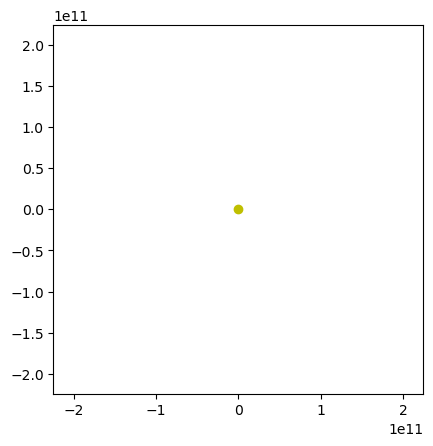

In [85]:
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-1.5 * AU, 1.5 * AU)
ax.set_ylim(-1.5 * AU, 1.5 * AU)
ax.plot(0, 0, 'yo', label="Sun")  # Sun at the origin
planet, = ax.plot([], [], 'bo', label="Planet")  # Planet marker

In [87]:
# Initialize the plot
def init():
    planet.set_data([], [])
    return planet,


In [93]:
def update(frame):
    global position, velocity
    # Calculate force and acceleration
    force = gravitational_force(position)
    acceleration = force / mass_planet
    
    # Update velocity and position using simple Euler method
    velocity += acceleration * dt
    position += velocity * dt
    
    # Append positions for trail effect
    x_positions.append(position[0])
    y_positions.append(position[1])
    
    # Update planet position, wrapped in lists to avoid the RuntimeError
    planet.set_data([position[0]], [position[1]])
    return planet,

In [95]:
# Create the animation
ani = FuncAnimation(fig, update, frames=365, init_func=init, blit=True, interval=20)

# Display the animation in the notebook
HTML(ani.to_jshtml())